# Drawing and using a Great Arc

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/great_arc_example.html

How to define and draw a great arc on an image of the
Sun, and to extract intensity values along that arc.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import quantity_support

import sunpy.map
from sunpy.coordinates.utils import GreatArc
from sunpy.data.sample import AIA_171_IMAGE

quantity_support();

We start with the sample data.

In [ ]:
m = sunpy.map.Map(AIA_171_IMAGE)

Let's define the start and end coordinates of the arc.

In [ ]:
start = SkyCoord(735 * u.arcsec, -471 * u.arcsec, frame=m.coordinate_frame)
end = SkyCoord(-100 * u.arcsec, 800 * u.arcsec, frame=m.coordinate_frame)

Create the great arc between the start and end points.

In [ ]:
great_arc = GreatArc(start, end)

Plot the great arc on the Sun.

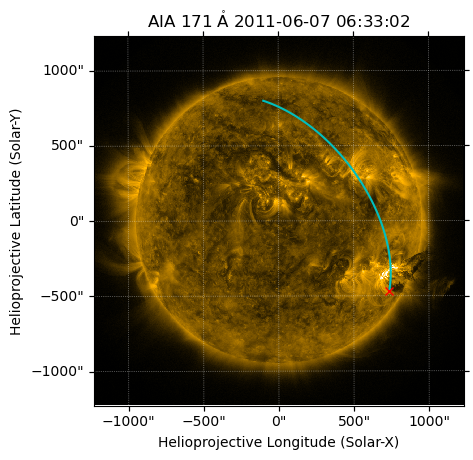

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=m)
m.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
ax.plot_coord(great_arc.coordinates(), color='c')
ax.plot_coord(start, 'x', color='red')
plt.show()

Now we can get the intensity along the great arc coordinates, along with the
angular distance from the start of the arc

In [ ]:
coords = great_arc.coordinates()
intensity_coords = sunpy.map.pixelate_coord_path(m, coords)
intensity = sunpy.map.sample_at_coords(m, intensity_coords)
separation = intensity_coords.separation(intensity_coords[0]).to(u.arcsec)

Plot the intensity along the arc from the start to the end point.

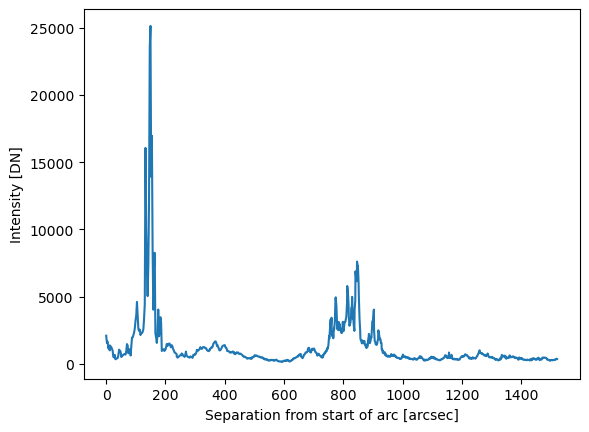

In [ ]:
fig, ax = plt.subplots()
ax.plot(separation, intensity)
ax.set_xlabel(f'Separation from start of arc [{separation.unit}]')
ax.set_ylabel(f'Intensity [{intensity.unit}]')

plt.show()